
# **An analysis of financial inclusion in East Africa**

**Problem Definition**

This project aims to analyze the level and scope of financial inclusion in East Africa's demography by using bank account ownership as the main indicator of financial inclusion. It will also provide insights to the demographic makeup and distribution of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda.

**Metric for Success**

Financial Inclusion is one of the main obstacles to economic and human development in Africa. The unbanked who are a majority in East Africa are left behind as they lack access to credit and financial services. This only furthers the poverty rate and slows down economic growth.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion.Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services.  

**Experimental Design**

Below are the steps conducted in this analysis.

1.  Load and preview the data.
2.  Data Cleaning (check for and deal with outliers,checking for anomalies, messy column names, values and missing data)
3.  Univariate Analysis
4.  Bivariate Analysis
5.  Multivariate Analysis
6.  Implementing the Solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
7.  Challenging the Solution by providing insights on how you can make improvements.

**Data Validation**

The main dataset contains demographic information and ownership of a bank account by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data available for this analysis is valid and useful towards answering the reseach question as it will allow us to identify some of the key demographic factors that influence whether an individual likely to have a bank account.

**Understanding our data**:

We have a dataset that contains the following columns: 

1.  *country*:interviewee country
2.  *year*: Year survey was done in.
3.  *uniqueid*: Unique identifier for each interviewee
4.  *has_a\_bank_account* : Yes , No
5.  *location_type*:Type of location: Rural, Urban
6.  *cellphone_access*: If interviewee has access to a cellphone: Yes, No
7.  *household_size:* Number of people living in one house
8.  *age_of_respondent*: The age of the interviewee
9.  *gender_of_respondent*: Gender of interviewee: Male, Female
10. *relationship_with_head*: The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Don't know
11. *marital_status*: The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
12. *education_level:* Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Don't know/RTA
13. *Type of job* :Interviewee *has* Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Don't Know/Refuse to answer

We will start by performing EDA on our data set.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Load our dataset
#This is our dataset : https://bit.ly/FinancialDataset

finance_df = pd.read_csv('https://bit.ly/FinancialDataset')

#Check our first five records

finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Check out last five records

finance_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#Check shape of our dataset

finance_df.shape

(23524, 13)

Our dataset has 13 columns and 23524 rows/records

In [ ]:
#Check datatypes of our columns

finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:

#Description of our data
finance_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


**Data Cleaning:**

We start cleaning our data by checking for any missing data, outliers, messy column values and duplicates.

In [ ]:
#Fix messy column names
finance_df.columns = finance_df.columns.str.strip().str.lower().str.replace(' ', '_')
finance_df.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [ ]:
#Check for unique values
finance_df.nunique()

country                      4
year                         6
uniqueid                  8735
has_a_bank_account           2
type_of_location             2
cell_phone_access            2
household_size              21
respondent_age              85
gender_of_respondent         2
the_relathip_with_head       6
marital_status               5
level_of_educuation          7
type_of_job                 10
dtype: int64

In [ ]:
#Check unique values for year
finance_df['year'].unique()
finance_df['year'].value_counts()

2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [ ]:
#Check row for 2029,2056,2039
finance_df[finance_df['year']== 2029]


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
#Since data collection for Kenya took place in 2018 , we replace 2029 with 2018
finance_df.loc[finance_df['year']==2029,'year']= 2018

In [ ]:
finance_df[finance_df['year'] == 2056 ]

#Since data collection for Kenya took place in 2018 , we replace 2029 with 2018
finance_df.loc[finance_df['year']==2056,'year']= 2018

In [ ]:
finance_df[finance_df['year']== 2039]

#Since data collection for Rwanda took place in 2016 , we replace 2039 with 2016
finance_df.loc[finance_df['year']==2039,'year']= 2016

In [ ]:
#Check our unique values
finance_df['year'].unique()

array([2018, 2016, 2017])

In [ ]:
#Total number of unique values of the columns
#nunique() would return the number of unique elements in each column
print(finance_df.nunique())


country                      4
year                         3
uniqueid                  8735
has_a_bank_account           2
type_of_location             2
cell_phone_access            2
household_size              21
respondent_age              85
gender_of_respondent         2
the_relathip_with_head       6
marital_status               5
level_of_educuation          7
type_of_job                 10
dtype: int64


In [ ]:
#Check for missing values
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#Dealing with missing values

#For country let's check which rows have the missing data
finance_df[finance_df['country'].isna()]

#We see that countries whose data was collected in 2017 had missinf values, We know that records for Tanzania was collected in 2017
#We replace Nan with Tanzania
finance_df["country"].fillna("Tanzania", inplace = True)

finance_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#For the numerical variables we can fill the missing values with the mean
finance_df["household_size"].fillna(finance_df['household_size'].mean(), inplace = True)
finance_df["respondent_age"].fillna(finance_df['respondent_age'].mean(), inplace = True)

finance_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size             0
respondent_age             0
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#The remaining missing values are categorical values 
#For the columns the_relathip_with_head,marital_status,level_of_educuation,type_of_job
#We can replace Nan with Don't know     
          
finance_df['the_relathip_with_head'].fillna("Dont know", inplace = True) 
finance_df['marital_status'].fillna("Dont know", inplace = True) 
finance_df['level_of_educuation'].fillna("Other/Dont know/RTA", inplace = True) 
finance_df['type_of_job'].fillna("Dont Know/Refuse to answer", inplace = True)      

finance_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size             0
respondent_age             0
gender_of_respondent      34
the_relathip_with_head     0
marital_status             0
level_of_educuation        0
type_of_job                0
dtype: int64

In [ ]:
#The remaining dataset has binary type of data which is not easy to deduce from other values
#Hence, we can drop all remaining null values
finance_df.dropna(inplace= True)
finance_df.isnull().sum()

#We have no missing values now.

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

In [ ]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23447 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23447 non-null  object 
 1   year                    23447 non-null  int64  
 2   uniqueid                23447 non-null  object 
 3   has_a_bank_account      23447 non-null  object 
 4   type_of_location        23447 non-null  object 
 5   cell_phone_access       23447 non-null  object 
 6   household_size          23447 non-null  float64
 7   respondent_age          23447 non-null  float64
 8   gender_of_respondent    23447 non-null  object 
 9   the_relathip_with_head  23447 non-null  object 
 10  marital_status          23447 non-null  object 
 11  level_of_educuation     23447 non-null  object 
 12  type_of_job             23447 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


The dataset contains 23525 rows and 13 columns

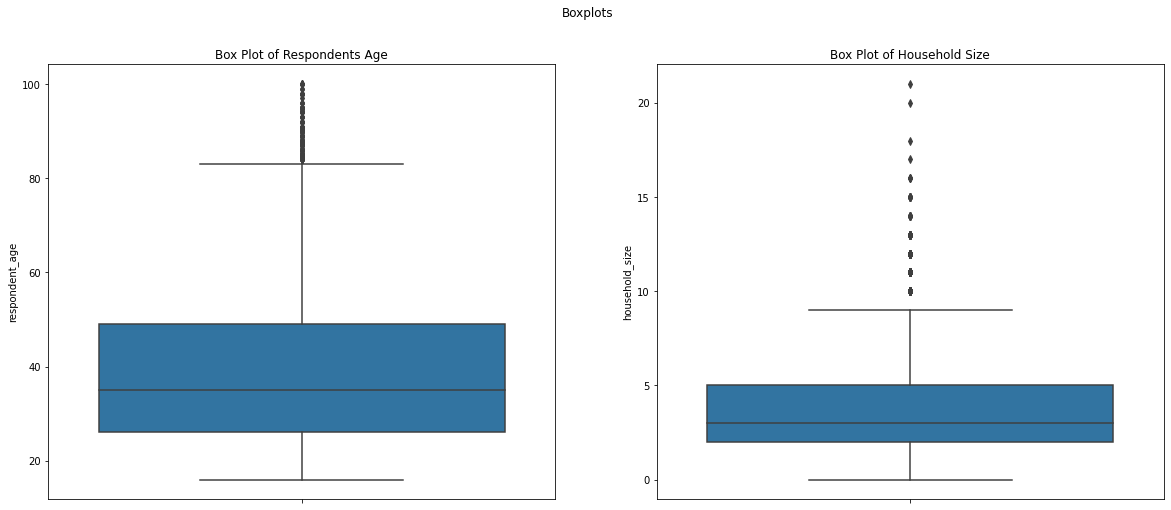

In [ ]:
#Check for outliers.
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=finance_df, y = "respondent_age", ax=ax[0])
ax[0].set_title('Box Plot of Respondents Age')
sns.boxplot(data=finance_df, y = "household_size", ax=ax[1])
ax[1].set_title('Box Plot of Household Size')

plt.show()


#We keep the outliers since it is possible to have people with ages greater than 80.
#Also it is common for some families to leave together with extended 
#family hence household size greater then 10 is possible

**Anomalies**

In [ ]:
# Checking for Anomalies

# 'respondent_age' variable
q1_age = finance_df['respondent_age'].quantile(.25)
q3_age = finance_df['respondent_age'].quantile(.75)

iqr_age = q3_age - q1_age

# 'household_size' variable
q1_size = finance_df['household_size'].quantile(.25)
q3_size = finance_df['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

print(iqr_age, iqr_size)



23.0 3.0


The results show that 'respondent age' and 'household size' variables have 23 and 3 (respectively)records that do not lie within the upper and lower bounds

In [ ]:
finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


**UNIVARIATE ANALYSIS**

In [ ]:
#The relationship between gender of the respondent and access to bank accounts
#Count the number of respondents who can access bank accounts and those who can not access bank accounts(we need only analyze those that can access bank accounts):

In [ ]:
print(finance_df[finance_df['has_a_bank_account'] == 'Yes']['has_a_bank_account'].count())
print(finance_df[finance_df['has_a_bank_account'] == 'No']['has_a_bank_account'].count())

3305
20142


3309 people had access to bank accounts while 20142 did not have access to bank accounts

In [ ]:
finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#We then Split the dataset into two parts based on the access to bank account. To do this, we pass the required condition in square brackets to the data object, which examines all the entries with the condition mentioned and creates a new object with only the required values.
finance_df_accessible = finance_df[finance_df['has_a_bank_account'] == 'Yes']
finance_df_not_accessible = finance_df[finance_df['has_a_bank_account'] == 'No']

In [ ]:
finance_df.head()

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# numerical data
finance_df.describe()

,year,household_size,respondent_age
count,23447.000000,23447.000000,23447.000000
mean,2016.975690,3.686926,38.807417
std,0.848654,2.279248,16.516712
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23447 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23447 non-null  object 
 1   year                    23447 non-null  int64  
 2   uniqueid                23447 non-null  object 
 3   has_a_bank_account      23447 non-null  object 
 4   type_of_location        23447 non-null  object 
 5   cell_phone_access       23447 non-null  object 
 6   household_size          23447 non-null  float64
 7   respondent_age          23447 non-null  float64
 8   gender_of_respondent    23447 non-null  object 
 9   the_relathip_with_head  23447 non-null  object 
 10  marital_status          23447 non-null  object 
 11  level_of_educuation     23447 non-null  object 
 12  type_of_job             23447 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


**Summary**

The dataset contains 23447 rows and 9 columns after dealing with the missing values.There are 3309 people who can access bank accounts in the dataset, which is where I’ll focus my analysis.

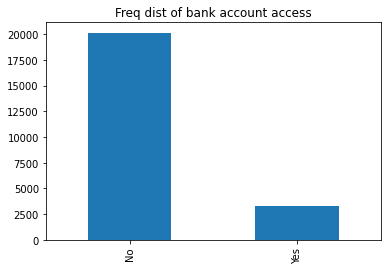

In [ ]:
#Has access to bank account column is a categorical variable
#For categorical columns we plot histograms, we use the value_count() and plot.bar() functions to draw a bar plot, which is commonly used for representing categorical data using rectangular bars with value counts of the categorical values. In this case, we have two types of answers in the has a bank account column ie Yes or no. The bar plot shows comparisons among these discrete categories, with the x-axis showing the specific categories and the y-axis the measured value.
finance_df['has_a_bank_account'].value_counts().plot.bar(title='Freq dist of bank account access')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

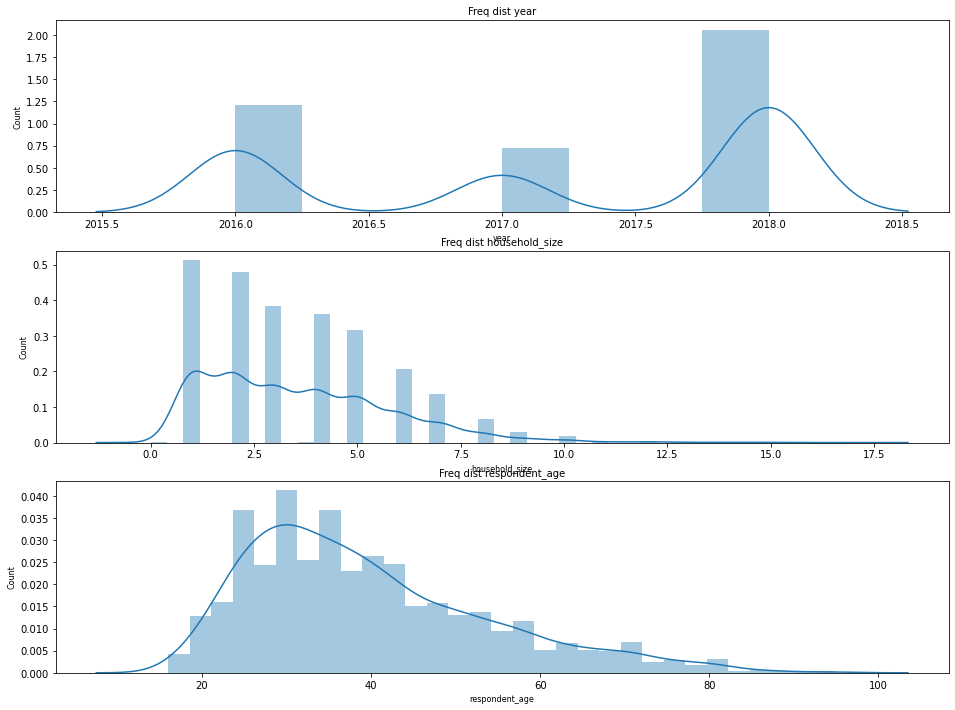

In [ ]:
 # plot the univariate distribution of the numerical columns which contains the histograms and the estimated PDF. We use displot of the seaborn library to plot this graph:
col_names=['year','household_size','respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(finance_df_accessible[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()


We can see that leaving the Year column every other column is skewed to the left which indicates most of the values lie in the lower range values.The year attribute shows normal distribution.

In [ ]:
finance_df

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


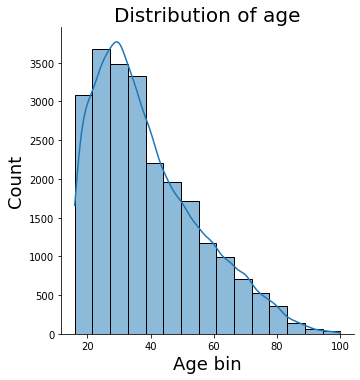

In [ ]:
#analysing the numeric variables
finance_df1 = finance_df[['household_size', 'respondent_age']]
#Analyssing our respondents age
sns.displot(finance_df['respondent_age'], bins = 15,kde = True)
plt.title('Distribution of age', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Age bin', fontsize = 18)
plt.show()

In [ ]:
#the descriptive statistics of the data
finance_df1['respondent_age'].describe()

count    23447.000000
mean        38.807417
std         16.516712
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

From the table the minimum age of the respondent is sixteen years while the maximum age of the age is 100 years. The average age of the respondent is 38 years.

Text(0.5, 6.79999999999999, 'Household size bin')

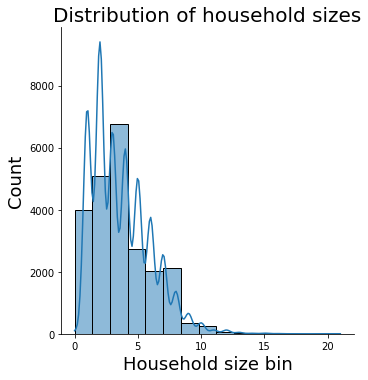

In [ ]:
#analysing the household size
sns.displot(finance_df1['household_size'], bins = 15,kde = True)
plt.title('Distribution of household sizes', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Household size bin', fontsize = 18)

In [ ]:
finance_df1['household_size'].describe()

count    23447.000000
mean         3.686926
std          2.279248
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

The average household size of the data is 3 people per household the maximum household size is 21 people in the household.

In [ ]:
fig = plt.figure(figsize=(18,10), dpi=1600)
#1 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(finance_df['gender_of_respondent'].value_counts(),
        labels = ['Male','Female'],startangle = 90 , autopct = '%.2f')
plt.title("Pie Chart of respondent's age")

#first row sec column
ax1 = plt.subplot2grid((1,2), (0, 1))
plt.pie(finance_df['type_of_location'].value_counts(),
        labels = ['Rural','Urban'],startangle = 180 , autopct = '%.2f')
plt.title('Pie chart showing Location Type')

plt.show()

**Measures of Dispersion**

In [ ]:
#Age
#Standard deviation
age_std = finance_df1['respondent_age'].std()
print("The Respondent's age standard deviation is ",age_std)

#Variance
age_var = finance_df1['respondent_age'].var()
print("The Respondent's age variance is ",age_var)


#Range
age_max = finance_df1['respondent_age'].max()
age_min = finance_df1['respondent_age'].min()
age_range = age_max - age_min
print('The range of the Respondent age is : ',age_range)


#Interquartile Range
#the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).
from scipy.stats import iqr
age_iqr = iqr(finance_df1['respondent_age'])
print('The Interquartile Range for Respondent age variable is : ',age_iqr)


#Skewness
#Measeure of symmetry
age_skew = finance_df1['respondent_age'].skew()
print('The skewness of age variable is : ',age_skew)



#Kurtosis
age_kurt = finance_df1['respondent_age'].kurt()
print('The kurtosis of age variable is : ',age_kurt)




The Respondent's age standard deviation is  16.516711802713548
The Respondent's age variance is  272.801768773897
The range of the Respondent age is :  84.0
The Interquartile Range for Respondent age variable is :  23.0
The skewness of age variable is :  0.8418778832863799
The kurtosis of age variable is :  0.10346047874300401


Skewness is positive meaning that data is skewed right. Since Kurtosis is greater than zero , we can say data is heavy tailed hence there's presence of outliers

In [ ]:
#HouseHold Size
#Standard deviation
Hsize_std = finance_df1['household_size'].std()
print("The Respondent's Household size standard deviation is ",Hsize_std)


#Variance
Hsize_var = finance_df1['household_size'].var()
print("The Respondent's Household size variance is ",Hsize_var)


#Range
Hsize_max = finance_df1['household_size'].max()
Hsize_min = finance_df1['household_size'].min()
Hsize_range = Hsize_max - Hsize_min
print('The range of the Respondent Household size is : ',Hsize_range)


#Interquartile Range
#the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).
from scipy.stats import iqr
Hsize_iqr = iqr(finance_df1['household_size'])
print('The Interquartile Range for Respondent Household size variable is : ',Hsize_iqr)


#Skewness
#Measeure of symmetry
Hsize_skew = finance_df1['household_size'].skew()
print('The skewness of Household size variable is : ',Hsize_skew)



#Kurtosis
Hsize_kurt = finance_df1['household_size'].kurt()
print('The kurtosis of Household size variable is : ',Hsize_kurt)



The Respondent's Household size standard deviation is  2.279247718307969
The Respondent's Household size variance is  5.1949701614120825
The range of the Respondent Household size is :  21.0
The Interquartile Range for Respondent Household size variable is :  3.0
The skewness of Household size variable is :  0.9752673119630328
The kurtosis of Household size variable is :  1.1580661329361344


Skewness is positive meaning that data is skewed right. Since Kurtosis is greater than zero , we can say data is heavy tailed hence there's presence of outliers

**DEDUCTIONS FROM UNIVARIATE ANALYSIS**

**Numerical variables**:

Age distribution was skewed to the right. The mean age was 38 , median was 35 , mode was 30.This shows that most of our respondents were in their thirties.

The Household size distribution was skewed to the right. Mean was 3 , median was 3 and mode was 2.

**Categorical variables**:

. From the dataset, we can say that there were more males than females interviewed.

. Also, most respondents reside in the rural areas compared to urban areas.

. Most of the respondents were heads of the household and were married or living together with their spouses.

. Most of them had access to cellphones and were self employed. Most of the respondents did not have bank accounts.

**BIVARIATE ANALYSIS**

**Visual Analysis of Categorical Variables**

**Numerical-Numerical**

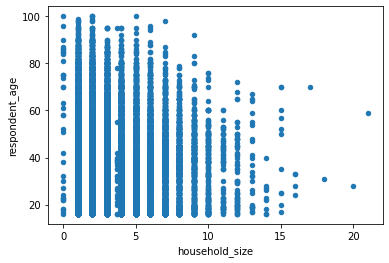

In [ ]:
# for numerical-numerical  we do scatter plot and  linear correlation where scatter plot 
#The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot
finance_df1.plot.scatter('household_size','respondent_age')

The scatter plot show that as the house hold size increases,the respondent age decreases.

In [ ]:
# Linear correlation to show the strength of the relationship between the two variables
finance_df1['household_size'].corr(finance_df1['respondent_age'])

-0.11980831235152938

There is  Weak negative correlation between house hold size and respondent age.This means if we increase one variable  the the 2nd variable decreases with the same amount

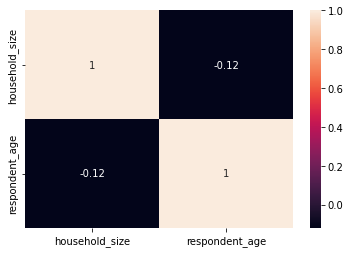

In [ ]:
# Plotting the Pearson correlation coefficient among numeric variables
# We can see that the two varibles below are not correlated
# since the correlation coefficients are close to 0

sns.heatmap(finance_df1.corr(),annot=True)
plt.show()

**Categorical - Categorical**

In [ ]:
# We can compare various categorical variables with each other
# To begin we can check how many individuals have bank accounts, based
# on their gender and type of location

pd.crosstab([finance_df.gender_of_respondent,finance_df.has_a_bank_account]
            ,finance_df.type_of_location,margins=True).style.background_gradient(cmap='Pastel1_r')


We see that generally, more men have bank accounts compared to women.It also shows that females who live in urban areas are more likely to have bank accounts relative to those who live in rural areas. The opposite is true for males

In [ ]:
# We can also check how many individuals have bank accounts, based
# on their marital status and also their phone ownership status

pd.crosstab([finance_df.cell_phone_access,finance_df.has_a_bank_account]
            ,finance_df.marital_status,margins=True).style.background_gradient(cmap='Pastel1_r')


We see that generally, individuals who have cell phones are likely to have have bank accounts compared to those who don't have cell phones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


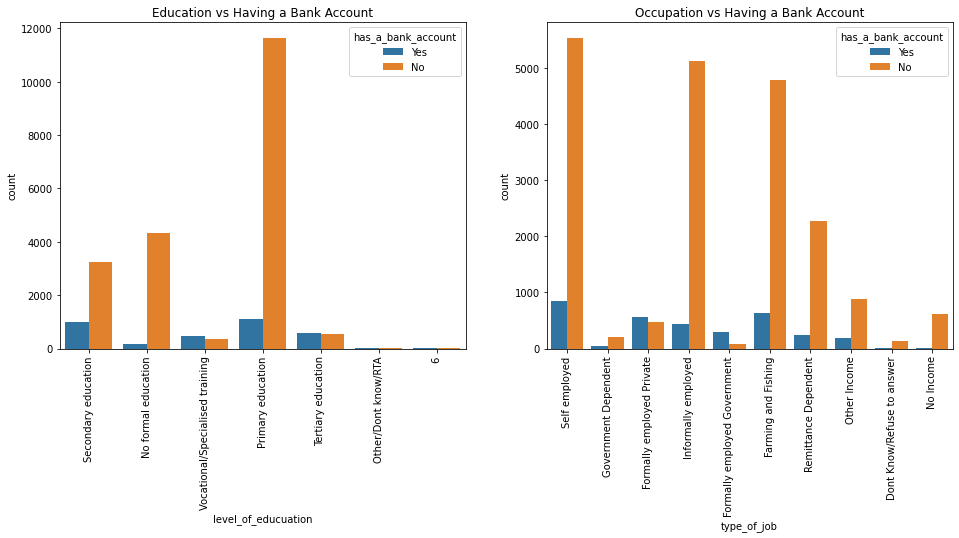

In [ ]:
# Comparing education level and occupation vs having a bank account


fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('level_of_educuation',hue='has_a_bank_account',data=finance_df,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('type_of_job',hue='has_a_bank_account',data=finance_df,ax=ax[1])
ax[1].set_title('Occupation vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

it is seen that level of education mattered alot as far as having bank account is concerned.Those who had primary and secondary education have more access to bank accounts.The self employed also had more access to bank accounts as compared to other types of job

In [ ]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23447 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23447 non-null  object 
 1   year                    23447 non-null  int64  
 2   uniqueid                23447 non-null  object 
 3   has_a_bank_account      23447 non-null  object 
 4   type_of_location        23447 non-null  object 
 5   cell_phone_access       23447 non-null  object 
 6   household_size          23447 non-null  float64
 7   respondent_age          23447 non-null  float64
 8   gender_of_respondent    23447 non-null  object 
 9   the_relathip_with_head  23447 non-null  object 
 10  marital_status          23447 non-null  object 
 11  level_of_educuation     23447 non-null  object 
 12  type_of_job             23447 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.0+ MB


In [ ]:
# correlations between various demographic info with bank account status

finance_df['type_of_location'].corr(finance_df['has_a_bank_account'])

-0.08824344467617874

In [ ]:
finance_df['cell_phone_access'].corr(finance_df['has_a_bank_account'])

0.20943545716751724

In [ ]:
finance_df['household_size'].corr(finance_df['has_a_bank_account'])

-0.022222336818058

In [ ]:
finance_df['gender_of_respondent'].corr(finance_df['has_a_bank_account'])

0.11658534225280977

Correlation coefficients between -.20 and .20 are generally considered to be weak and therefore type_of_location,cell phone access, house hold size and gender of respondents have weak correlation with access to bank accounts

**Bivariate analysis findings**

**Numerical:**

Younger people had bank accounts compared to the elder people Household with less people had bank accounts.

There was a very small correlation between the household size and one owning a bank account. There was a very small correlation between the household size and one owning a bank account.

**Categorical:**

Repondents who were head of their households, Most of them had no bank accounts. Among those with bank accounts, they were also the most. This may be because they were the majority in that demograph.

Respondents who were married were the majority among those with bank accounts and also those without.

We noted that a majority of respondents with only a Primary level of education had no bank accounts. However respondents with any form of education, e.g secondary, vocational , tertiary, most of them had bank accounts.

Most respondents had access to cellphones and yet did not have bank accounts.

Most respondents who were female did not have bank accounts.

Problems and Recommendations

Our data is highly imbalanced. It leans more towards certain demographics than others.

Also our data is collected from different years for different countries hence may result to some minor inaccuracies.

**MULTIVARIATE ANALYSIS**

We will use Principal Component Analysis (PCA) to select the most important features in the dataset that tell us the maximum amount of information about the dataset

In [ ]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [ ]:
# We need to change some categorical attributes to numeric since pca works with numerical data

encode = {"has_a_bank_account": {"Yes":1, "No":0}, "gender_of_respondent": {"Male":1, "Female":0},
        "cell_phone_access":{"Yes":1,"No":0}, "type_of_location": {"Rural":1, "Urban":0},
          "level_of_educuation":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "the_relathip_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}

In [ ]:
finance_df.replace(encode, inplace = True)
finance_df.head()

,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation
0,1,1,1,3.0,24.0,0,3,0,2
1,0,1,0,5.0,70.0,0,0,3,0
2,1,0,1,5.0,26.0,1,4,1,3
3,0,1,1,5.0,34.0,0,0,0,1
4,0,0,0,8.0,26.0,1,1,1,1


In [ ]:
finance_df.dtypes


has_a_bank_account          int64
type_of_location            int64
cell_phone_access           int64
household_size            float64
respondent_age            float64
gender_of_respondent        int64
the_relathip_with_head      int64
marital_status              int64
level_of_educuation         int64
dtype: object

**Standardize the features**

In [ ]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(finance_df)) #scaling the data and store the scaled feature set as a pandas data frame.
scaled_data

,0,1,2,3,4,5,6,7,8
0,2.468684,0.798563,0.588990,-0.301389,-0.896530,-0.833669,1.274845,-0.864480,0.801990
1,-0.405074,0.798563,-1.697821,0.576112,1.888587,-0.833669,-0.817846,2.134552,-1.243173
2,2.468684,-1.252249,0.588990,0.576112,-0.775438,1.199516,1.972409,0.135198,1.824571
3,-0.405074,0.798563,0.588990,0.576112,-0.291070,-0.833669,-0.817846,-0.864480,-0.220592
4,-0.405074,-1.252249,-1.697821,1.892364,-0.775438,1.199516,-0.120282,0.135198,-0.220592
...,...,...,...,...,...,...,...,...,...
23442,-0.405074,0.798563,0.588990,0.137361,0.556574,-0.833669,-0.817846,1.134875,-1.243173
23443,-0.405074,0.798563,0.588990,-0.740140,-0.714892,-0.833669,-0.817846,0.135198,0.801990
23444,-0.405074,0.798563,0.588990,0.576112,-0.714892,-0.833669,0.577282,2.134552,-0.220592
23445,-0.405074,-1.252249,0.588990,1.453613,-0.533254,-0.833669,0.577282,1.134875,0.801990


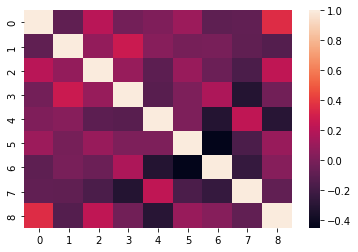

In [ ]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

We can clearly see that a darker shade represents less co-relation while a lighter shade represents more co-relation. We can observe from the above heatmap that 5 and 6 have high co-relation. Thus, we evidently need to apply dimensionality reduction.

**Applying Principal Component Analysis**

We will apply PCA on the scaled dataset.We need to create an object of PCA  and while doing so we also need to initialize n_components – which is the number of principal components we want in our final dataset. Here, we have taken n_components = 2, which means our final feature set will have 2 columns. We fit our scaled data to the PCA object which gives us our reduced dataset.

In [ ]:
#Applying PCA
#Taking no. of Principal Components as 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2'])
data_pca.head()

,PC1,PC2
0,-2.256031,0.214378
1,3.092189,-0.961741
2,-2.557532,1.473748
3,-0.543356,-0.472620
4,-0.088745,-0.356749


**Checking Co-relation between features after PCA**

Now that we have applied PCA and obtained the reduced feature set, we will check the co-relation between various Principal Components, again by using a heatmap.

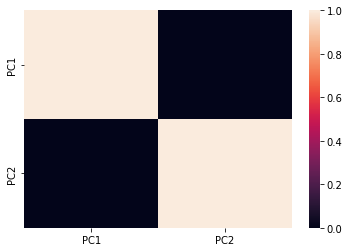

In [ ]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.

In [ ]:
# Preprocessing

# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# We can store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

x = finance_df.drop('has_a_bank_account',1)
y = finance_df['has_a_bank_account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [ ]:
# Checking the x variable

x.shape


(23447, 8)

In [ ]:
# Checking the y variable

y.shape

(23447,)

In [ ]:
# we now Split the dataset into the Training set and Test set
# lets define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Normalization
 
# We will perform standard scalar normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Applying PCA

# We expect this code to return all the features in the feature set for both the training and test sets
# since we havent specified the number of components in the constructor

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Explained Variance Ratio

# we need to check the variance caused by each of the principal components using
# the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance



array([0.22974683, 0.18793178, 0.17013781, 0.11555847, 0.09416687,
       0.08051338, 0.07412638, 0.04781848])

The result above shows that the first principal component is responsible for 22.96% variance.The 2nd  principal component causes 18.89% variance in the dataset.summation of 1st and 2nd principle components ie (22.96 + 18.89) gives 41.85% .Therefore 41.85% of the classification information contained in the feature set is captured by the first two principal components.

In [ ]:
# Using 2 Principal Component to train algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Training and Making Predictions using random forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4027    0]
 [ 663    0]]
Accuracy 0.85863539445629


with two feature, the random forest algorithm is able to correctly predict an 85.86% accuracy

In [ ]:
# Using 1 Principal Components to train algorithm
# and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[4027    0]
 [ 663    0]]
Accuracy 0.85863539445629


with only features, the random forest algorithm is able to correctly predict an 85.86% accuracy.

**Discriminant Analysis**

In [ ]:
# lets evaluate the “factorability” of our dataset
# If Bartlett’s test turns out to be statistically insignificant, then we cannot use a factor analysis.

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(finance_df)
chi_square_value, p_value

(27040.367226067192, 0.0)

Here the Bartlett ’s test shows that the p-value is 0. The test was statistically insignificant,indicating that the observed correlation matrix is not an identity matrix.

In [ ]:
# Next we can check the Kaiser-Meyer-Olkin (KMO) Test.This will help us to determine the adequacy for each observed variable and for the complete model.

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(finance_df)

kmo_model


0.5363302951130932

The overall KMO for our data is 0.53, which is also considered inadequate since kmo of less than 0.6 is considered inadequate and therefore  we cannot continue with planned factor analysis

In [ ]:
kmo_all,kmo_model = calculate_kmo(finance_df)
kmo_all,kmo_model

(                             KMO
 has_a_bank_account      0.560316
 type_of_location        0.553351
 cell_phone_access       0.681502
 household_size          0.626121
 respondent_age          0.581326
 gender_of_respondent    0.429568
 the_relathip_with_head  0.480546
 marital_status          0.534494
 level_of_educuation     0.559326, 0.5363302951130932)

The overal kmo for our data is 0.54 which is inadequate

**Discriminant Analysis**

In [ ]:
# Dividing data into training and test sets

x = finance_df.iloc[:,1:].values #select all rows and columns, but exclude column 1.
y = finance_df.iloc[:,0].values #slice your object, i.e. first row of your dataframe

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) 

# Evaluating the Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[3860  167]
 [ 458  205]]
Accuracy 0.8667377398720683


We can see that the accuracy attained in one linear discriminant ie 86.67% is greater than the accuracy attained with one principle component which is 85.86%

# **Conclusions and Recommendations** 

1.people with mobile phone access are very likely to have bank accounts.Banks can therefore utilize mobile banking capabilities to reach more people.

2.There is no big difference between people living in rural vs urban areas as far as having a bank account is concerned.

3.Individuals with Formal and Government jobs are less likely to have bank accounts.

